In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from getData import *

/home/ju/miniconda3/envs/AI/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
frames, indices = extract_frames_from_video('(3.) IMG_0177.MOV', (np.logspace(0, 1, 100)-1)/9)
frames = list(map(lambda image: resize_image(image, .2), frames))

In [2]:
prompt = """'Extrae este número en formato float de python, devuelve únicamente el 
número con el formato: "float" y sin ningún otro texto.'"""

In [3]:
def get_gemini_response(frames, prompt):
    """
    Sends a list of frames to Gemini and retrieves the float responses. 
    Args:
        frames (list): List of image frames.
        prompt (str): The prompt to send to Gemini.
    Returns:
        np.ndarray: Array of float responses from Gemini.
    """
    temp = np.zeros(len(frames), dtype=np.float32)
    for ii, frame in enumerate(frames):
        while True:
            try:
                temp[ii] = float(send_image_to_gemini(frame, prompt))
                break
            except Exception as e:
                print(f"Error readying image {ii}: {e}")
                continue
    return temp

In [ ]:
get_gemini_response(frames, prompt):

In [ ]:
plt.plot(np.array(indices[13:-1])/30, temp[13:], 'o-')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')

In [6]:
def func(t, T_0, T_inf, tau):
    return T_inf + (T_0 - T_inf) * np.exp(- t / tau)

from scipy.optimize import curve_fit

In [ ]:
args, covs = curve_fit(func, np.array(indices[13:-1])/30, np.array(temp[13:]), p0=[90, 30, 1])

In [ ]:
plt.plot(np.array(indices[13:-1])/30, temp[13:], 'o')
plt.plot(np.array(indices[13:-1])/30, func(np.array(indices[13:-1])/30, *args), 'r-')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')

In [ ]:
args

In [32]:
dataFrame = {}
for ii in range(1, 6):
    dataFrame[f'time_{ii}'] = []
    dataFrame[f'temperature_{ii}'] = []

dataFrame

{'time_1': [],
 'temperature_1': [],
 'time_2': [],
 'temperature_2': [],
 'time_3': [],
 'temperature_3': [],
 'time_4': [],
 'temperature_4': [],
 'time_5': [],
 'temperature_5': []}

In [36]:
data = pd.DataFrame(dataFrame)

# Extract frames from multiple videos and get temperature data
for ii in range(1,6):
    frames, indices = extract_frames_from_video(f'videos/{ii}.MOV', (np.logspace(0, 1, 100)-1)/9)
    frames = list(map(lambda image: resize_image(image, 1), frames))

    temp = get_gemini_response(frames, prompt)
    data[f'time_{ii}'] = np.array(indices[:-1])/30
    data[f'temperature_{ii}'] = temp

    print(f"Video {ii} processed.")
    

Enviando imagen a Gemini para análisis...
Video 5 processed.


In [37]:
data.head()

,time_1,temperature_1,time_2,temperature_2,time_3,temperature_3,time_4,temperature_4,time_5,temperature_5
0,0.000000,80.000000,0.000000,72.599998,0.000000,79.099998,0.000000,73.900002,0.000000,30.700001
1,2.333333,79.800003,2.366667,70.599998,0.933333,78.699997,1.666667,73.400002,4.233333,30.799999
2,4.766667,79.500000,4.833333,70.599998,1.933333,78.300003,3.366667,72.900002,8.566667,30.900000
3,7.233333,79.199997,7.333333,71.000000,2.933333,77.900002,5.100000,72.400002,13.000000,31.000000
4,9.766667,78.900002,9.900000,69.800003,3.933333,77.500000,6.900000,71.800003,17.566667,31.100000


In [43]:
data.to_csv('enfriamiento_data.csv', index=False)

In [7]:
data = pd.read_csv('enfriamiento_data.csv')
data.head()

,time_1,temperature_1,time_2,temperature_2,time_3,temperature_3,time_4,temperature_4,time_5,temperature_5
0,0.000000,80.0,0.000000,72.6,0.000000,79.1,0.000000,73.9,0.000000,30.7
1,2.333333,79.8,2.366667,70.6,0.933333,78.7,1.666667,73.4,4.233333,30.8
2,4.766667,79.5,4.833333,70.6,1.933333,78.3,3.366667,72.9,8.566667,30.9
3,7.233333,79.2,7.333333,71.0,2.933333,77.9,5.100000,72.4,13.000000,31.0
4,9.766667,78.9,9.900000,69.8,3.933333,77.5,6.900000,71.8,17.566667,31.1


In [8]:
func_1 = lambda t, T_0, tau: func(t, T_0, 22, tau)

In [9]:
tau = []

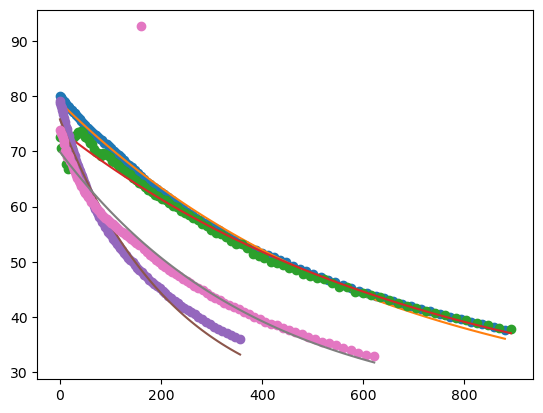

In [10]:
for ii in range(1, 5):
    args, covs = curve_fit(func_1, data[f'time_{ii}'], data[f'temperature_{ii}'], p0=[90, 1])
    plt.plot(data[f'time_{ii}'], data[f'temperature_{ii}'], 'o', label=f'Video {ii}')
    plt.plot(data[f'time_{ii}'], func_1(data[f'time_{ii}'], *args), '-', label=f'Fit Video {ii}')
    tau.append(args[1])

## Calentamiento con disipación

In [11]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(color=[
    # Par 1: Tonos claros de azul
    "#004080",  # Azul medio 2 (más contraste)
    "#3A8DC6",  # Azul claro 2 (alejado del blanco)


    # Par 2: Tonos profundos de azul
    "#003F9E",  # Azul intenso 1
    "#002C7A",  # Azul intenso 2 (un poco más profundo)

    # Par 3: Tonos violeta/magenta
    "#D340A1",  # Magenta brillante 1
    "#A02C78",  # Violeta oscuro 2
])

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)

In [12]:
t = np.array(data['time_5'])[10:]
T = np.array(data['temperature_5'])[10:]

t = t - t[0]
#T = T - (T[0] - 24)  # Ajustar para que T(0) sea 22


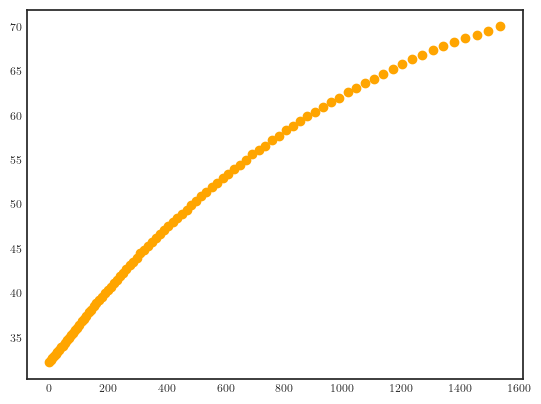

In [13]:
plt.scatter(t, T, label='Video 5', color='orange')

In [14]:
t_lin = t[:20]
T_lin = T[:20]

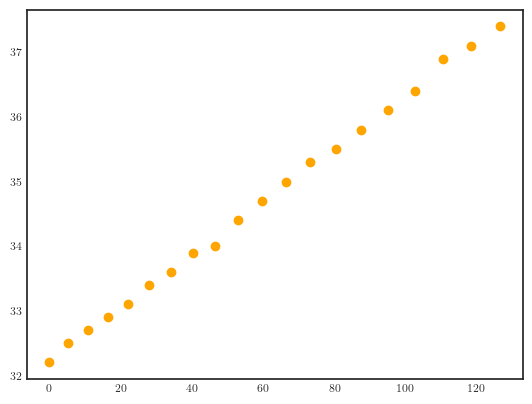

In [15]:
plt.plot(t_lin, T_lin, 'o', label='Linear Fit Data', color='orange')

In [16]:
from scipy.optimize import curve_fit

In [17]:
line = lambda t, m, b: m * t + b
args_lin, covs_lin = curve_fit(line, t_lin, T_lin, p0=[46/400, 30])

In [18]:
from sklearn.metrics import r2_score

In [19]:
R2 = r2_score(T_lin, line(t_lin, *args_lin))

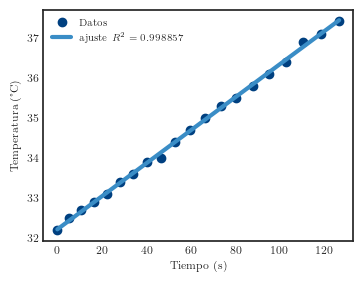

In [20]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t_lin, T_lin, 'o', label='Datos')  # Points in blue
plt.plot(t_lin, line(t_lin, *args_lin), '-', label=fr'ajuste $R^2={R2:.6f}$', linewidth=3)  # Curve in orange
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()

plt.savefig('calentamiento_lin_fit.png', dpi=300, bbox_inches='tight')

In [21]:
m, b = args_lin
args_lin, np.sqrt(np.diag(covs_lin))

(array([ 0.04121925, 32.22062108]), array([0.00032859, 0.02306917]))

In [22]:
args, covs = curve_fit(func, t, T, p0=[30, 80, 1000])

In [23]:
R2 = r2_score(T, func(t, *args))

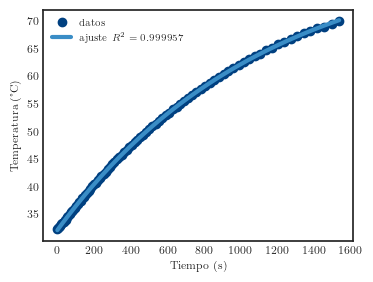

In [24]:
fig = plt.figure(figsize=(4, 3))
plt.plot(t, T, 'o', label='datos')
plt.plot(t, func(t, *args), '-', label=fr'ajuste $R^2={R2:.6f}$', linewidth=3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.savefig('calentamiento_fit.png', dpi=300, bbox_inches='tight')

In [25]:
args, np.sqrt(np.diag(covs))

(array([  32.06560706,   83.33548624, 1126.9405656 ]),
 array([0.01937379, 0.13385175, 5.0115612 ]))

In [26]:
T_0, T_inf, tau = args

In [27]:
m, (T_inf-25)/tau

(np.float64(0.04121925063736373), np.float64(0.05176447456077122))